In [2]:
import numpy as np

In [3]:
path_wave = 'C:/data/t0_b0_wave.npy'
path_scores = {'combined': 'C:/data/t0_b0_scores_new.npy', 'old': 'C:/data/t0_b0_scores_old.npy'}

In [4]:
wave = np.load(path_wave)
scores = [np.load(path) for _, path in path_scores.items()]
legend = [key for key in path_scores]

In [5]:
import matplotlib.pyplot as plt

In [6]:
def plot_wave_scores(wave, scores, scores_options=None):
    """
    Plots 3-channel waveforms and model prediction scores.
    """
    if score_options is None:
        scores_options = ['g', 'r', 'y']
    
    channels_num = wave.shape[1]
    classes_num = scores.shape[1]
    
    fig = plt.figure(figsize = (8.8, 5.2), dpi = 160)
    
    axes = fig.subplots(channels_num + classes_num, 1, sharex = True)

    # Plot wave
    for i in range(channels_num):
        
        axes[i].plot(wave[:, i])
        axes[i].locator_params(axis = 'both', nbins = 4)
        
    # Plot scores
    for i in range(classes_num):
        
        if i < len(scores_options):
            axes[channels_num + i].plot(scores[:, i], scores_options[i])
        else:
            axes[channels_num + i].plot(scores[:, i])
        
    fig.tight_layout()

In [7]:
wave_max = np.max(np.abs(wave))
wave = wave / wave_max

In [12]:
def plot_wave_comparred_scores(start_time, wave, *scores, right_shift=0., draw_max=True, 
                               colors=None, events=[], predictions=None, prediction_color=None, legend=None):
    """
    Plots 3-channel waveforms and model prediction scores.
    """
    from obspy.core.utcdatetime import UTCDateTime
    
    channels_num = wave.shape[1]
    
    classes_num = 3
    
    fig = plt.figure(figsize = (9.8, 7.), dpi = 300)
    
    if legend is None:
        axes = fig.subplots(channels_num + classes_num, 1, sharex = True)
    else:
        axes = fig.subplots(channels_num + classes_num + 1, 1, sharex = True)
        
    # Plot wave
    titles = ['N', 'E', 'Z']
    for i in range(channels_num):
        
        axes[i].plot(wave[:, i], linewidth = 1., color = '#000')
        axes[i].locator_params(axis = 'both', nbins = 4)
        axes[i].set_ylabel(titles[i])
        
    # Plot scores
    scores_options = ['', '--', ':']
    titles = ['P', 'S', 'N']
    
    # Time and freq
    freq = 100.
    start_time += right_shift
    
    p_predictions = None
    if predictions:
        p_predictions = []
        for p_pair in predictions:

            if p_pair is None: 
                p_predictions.append(None)
            else:
                p_predictions.append([int((p - start_time) * freq) for p in p_pair])

    for i in range(classes_num):
        
        l_max_pos = [score[:, i].argmax() if score is not None else None for score in scores]
        
        # Plot curves
        for j, score in enumerate(scores):
            
            if score is None: continue
            
            argv = {
                'linewidth': 1.,
            }
            
            if colors is not None: argv['color'] = colors[j]
            
            axes[channels_num + i].plot(score[:, i], scores_options[j], **argv)
            
        # Plot prediction positions
        if i != 2 and p_predictions is not None:
            
            for j, score in enumerate(scores):
                
                if p_predictions[j] is None:
                    break
                if len(p_predictions[j]) <= i:
                    continue
                
                argv = {
                    'markersize': 7.,
                }

                if prediction_color is not None: argv['color'] = prediction_color
                elif colors is not None: argv['color'] = colors[j]

                axes[channels_num + i].plot([p_predictions[j][i]], 
                                            score[:, i][p_predictions[j][i]], 
                                            '*', 
                                            **argv)
                
                
        # Plot max prediction probability points
        if i != 2 and draw_max:

            for j, (score, max_pos) in enumerate(zip(scores, l_max_pos)):

                if score is None: continue
                
                axes[channels_num + i].plot([max_pos], 
                                            score[:, i][max_pos], 
                                            scores_options[j] + '*', 
                                            markersize = 7)
        
        axes[channels_num + i].set_ylabel(titles[i])
        
        # axes[channels_num + i].set_xticks(np.arange(100, 2200, 400))
        
    # Configure ticks
    event_positions = [int((e - start_time) * freq) for e in events]
    
    ticks = [150, 1950]
    ticks += event_positions
    
    for ax in axes:
        ax.set_xticks(ticks)
    
    # Configure ticks labels
    xlabels = []
    for pos in axes[-1].get_xticks():
        
        c_time = start_time + pos/freq
        micro = c_time.strftime('%f')[:2]
        xlabels.append(c_time.strftime('%H:%M:%S') + f'.{micro}')
        
    axes[-1].set_xticklabels(xlabels)
    
    # Add date text
    date = start_time.strftime('%Y-%m-%d')
    fig.text(0.095, 1., date, va = 'center')
    
    # Plot legend
    if legend is not None:
        
        for j in range(len(legend)):

            argv = {
                'linewidth': 1.,
            }

            label = legend[j]
            argv['label'] = label

            if colors is not None: argv['color'] = colors[j]

            axes[channels_num + classes_num].plot([], scores_options[j], **argv)

        axes[channels_num + classes_num].legend()
        
    fig.tight_layout()

In [13]:
from obspy.core.utcdatetime import UTCDateTime

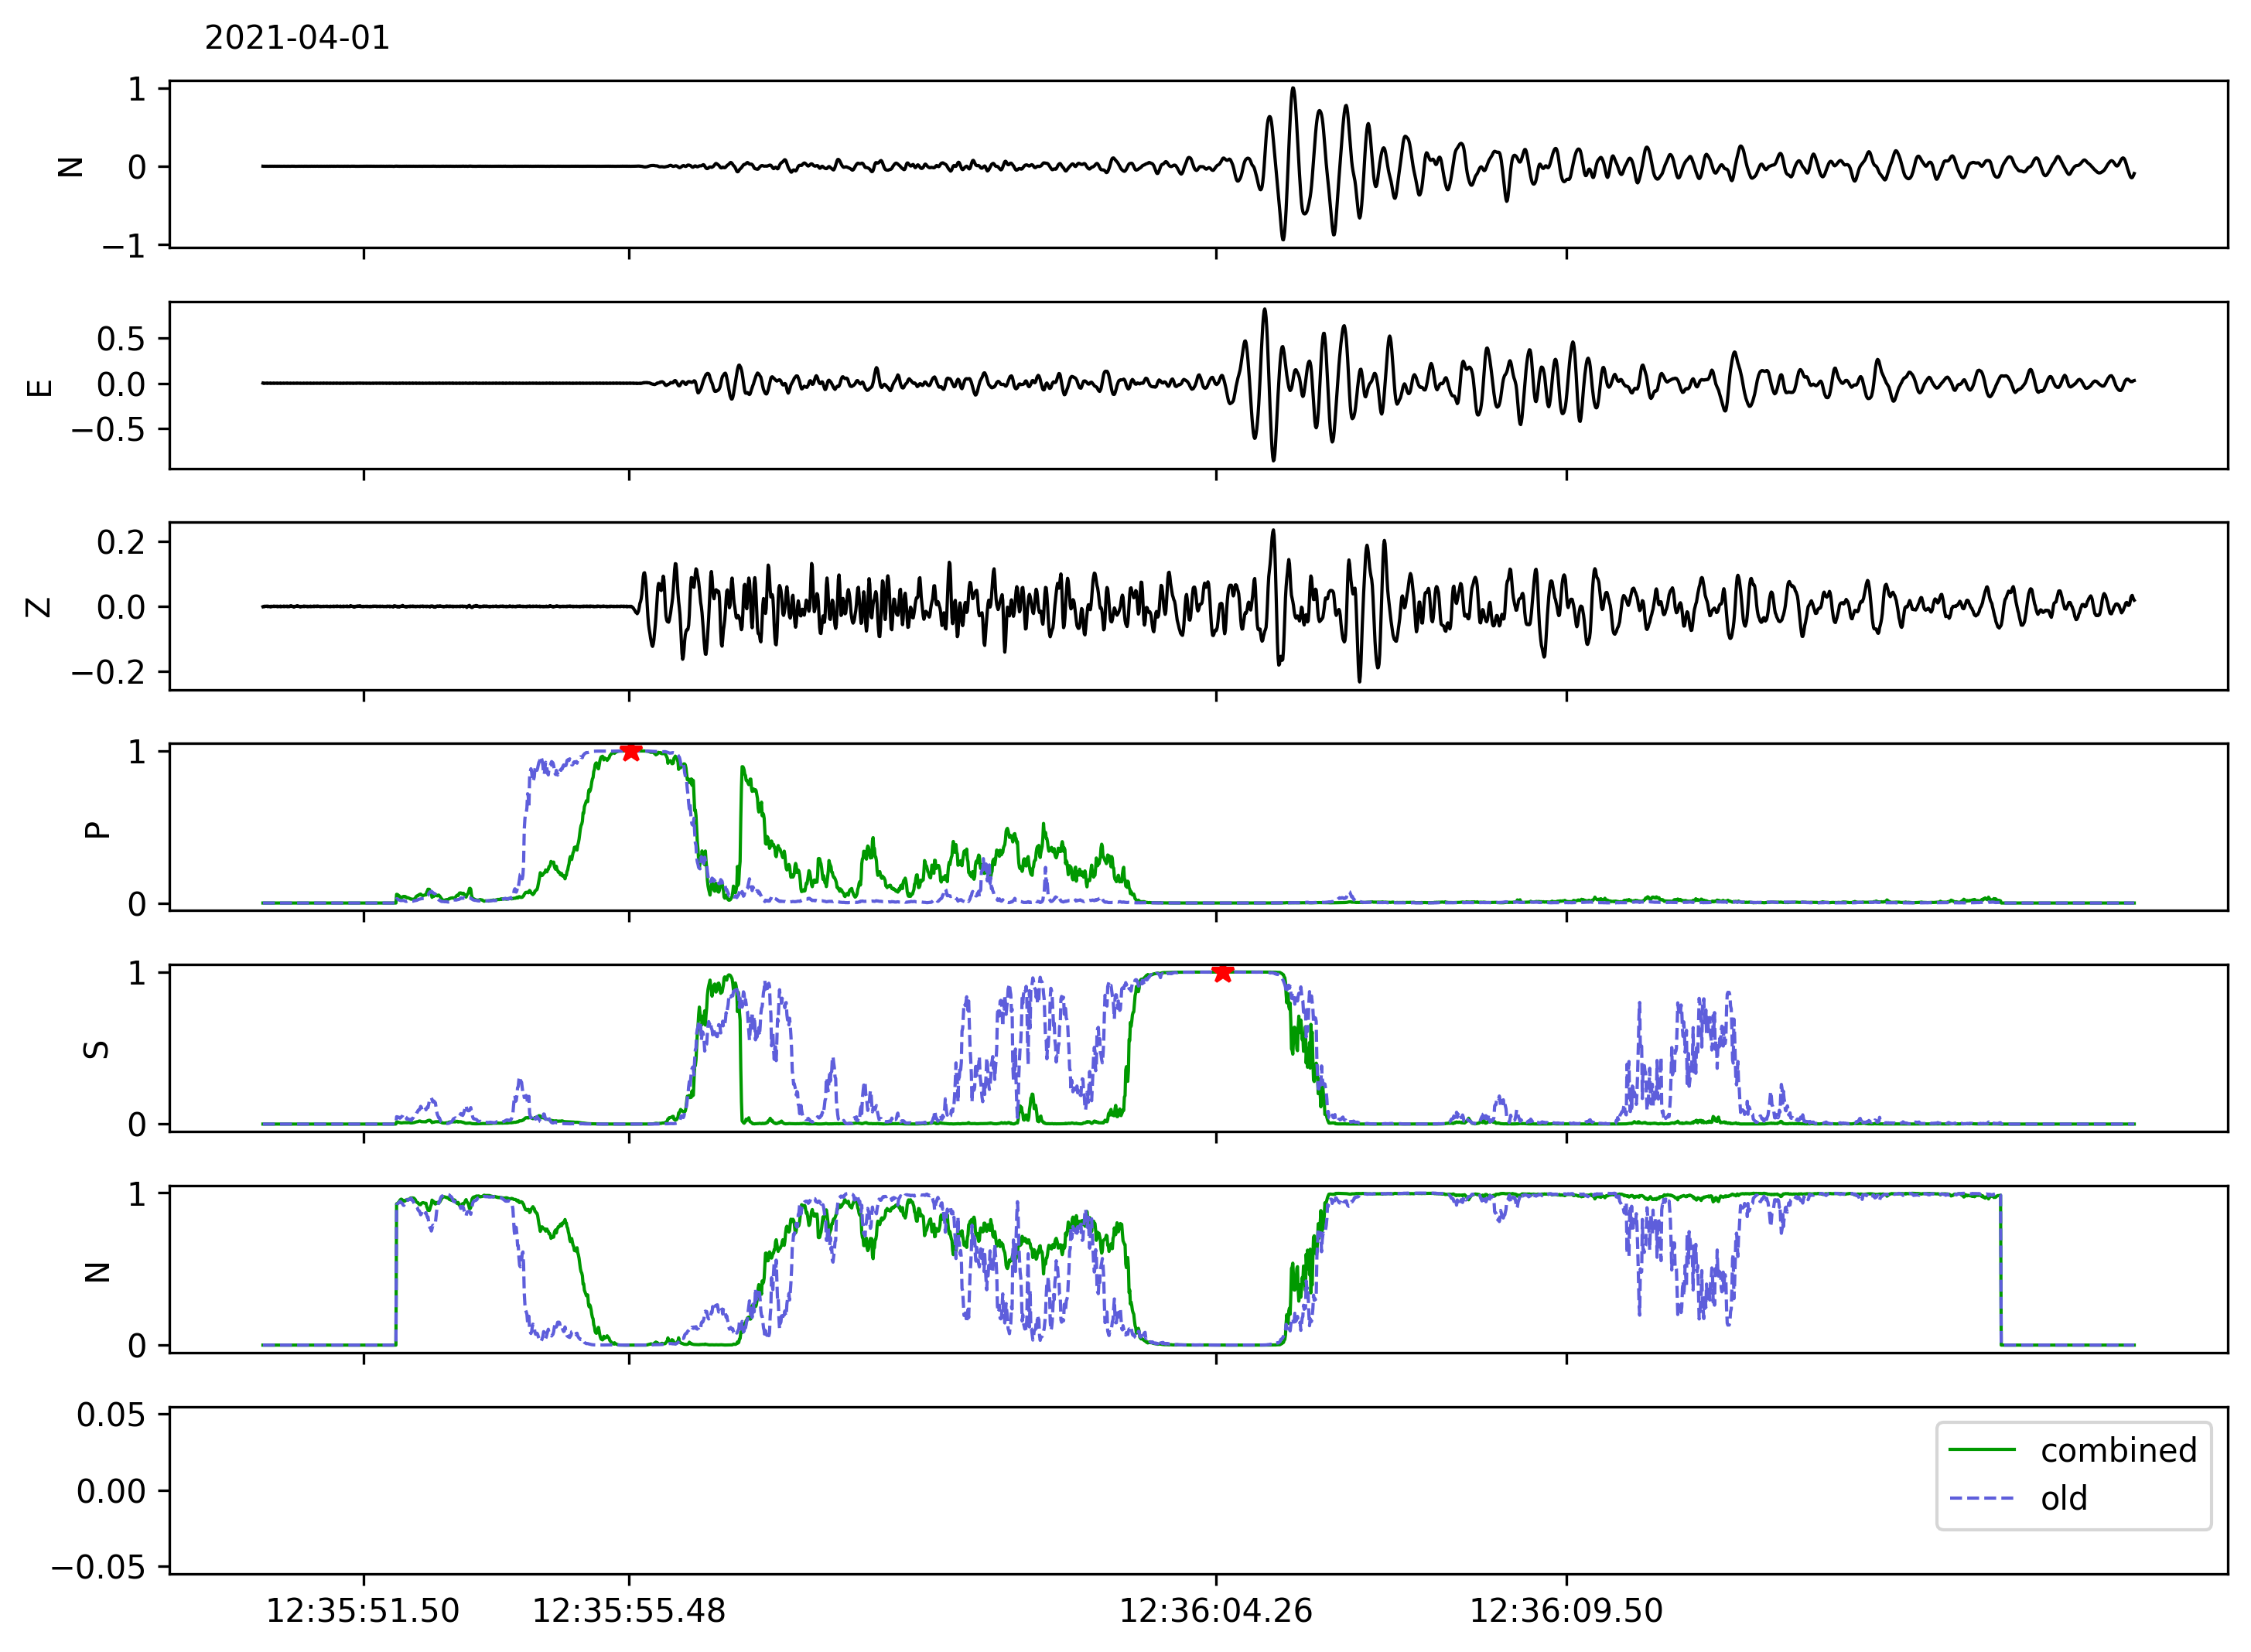

In [18]:
colors = [
    '#009900',
    '#5e5edb',
    '#f54043'
]

"""
predictions = [
    [UTCDateTime('2014-04-01T12:35:55.5'), UTCDateTime('2014-04-01T12:36:04.3')],
    [UTCDateTime('2014-04-01T12:35:55.5'), UTCDateTime('2014-04-01T12:36:04.5')],
    [UTCDateTime('2014-04-01T12:35:55.55'), UTCDateTime('2014-04-01T12:36:04.3')]
]
"""

predictions = [[UTCDateTime('2021-04-01T12:35:55.5'), UTCDateTime('2021-04-01T12:36:04.74')], None]
# predictions = [[UTCDateTime('2021-04-01T12:35:55.51'), UTCDateTime('2021-04-01T12:36:04.36')], None]

events = [
    UTCDateTime('2021-04-01T12:35:55.48'), 
    UTCDateTime('2021-04-01T12:36:04.26')
]

start = UTCDateTime('2021-04-01T12:35:50')

plot_wave_comparred_scores(start, 
                           wave, 
                           *scores, 
                           draw_max=False, 
                           colors=colors, 
                           events=events, predictions=predictions,
                           legend=legend, prediction_color='r')